## Задание 1. Первичный анализ данных c Pandas

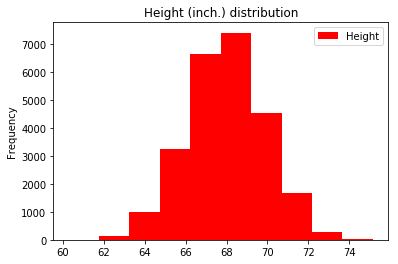

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

#считаем данные из файла со статистикой роста и веса студентов
# метод read_csv не просто считывает, а создает датафрейм, к которому потом можно применять методы 
data = pd.read_csv('weights_heights.csv', index_col='Index')

#рисуем гистограмму по росту
data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution')

In [32]:
#смотрим первые пять строк таблицы с помощью метода Head
data.head (5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


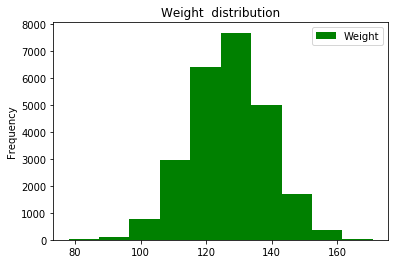

In [33]:
#теперь строим гистограмму веса, а не роста и делаем цвет зелёным
data.plot(y='Weight', kind='hist', color='green',  title='Weight  distribution')

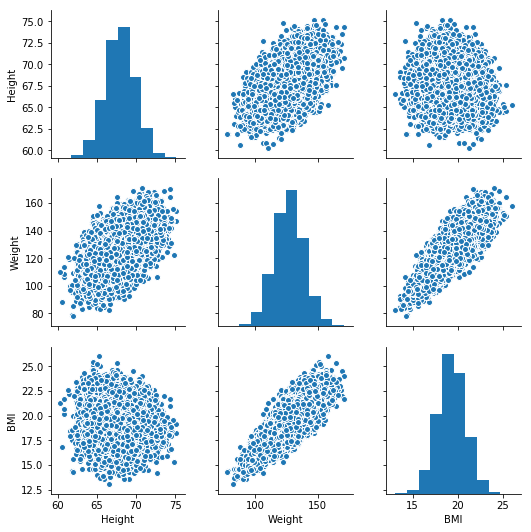

In [34]:
#создаем функцию, вычисляющую индекс массы тела
def  make_bmi (height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2



#добавляем в наш датафрейм столбец и даём ему название BMI, где указан индекс массы тела
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

#просто от себя добавим столбец соотношения веса и роста, т.е. сколько веса в одном сантиметре тела. очень грубо
#data['W/H'] = data.apply(lambda row: row['Weight']/row['Height'], axis=1)

#проверим, как добавился столбец BMI  первые пять строк таблицы с помощью метода Head
#data.head (5)

#применяем pairplot библиотеки Seaborn
sns.pairplot (data)

In [35]:
#напишем функцию, определяющую весовые категории. три весовые категории будут
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >=150:
        return 3
    else:
        return 2

#добавим новый столбец weight_category или весовую категорию
data['weight_cat'] = data.apply(lambda row: weight_category(row['Weight']), axis=1)

data.head (5)


,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


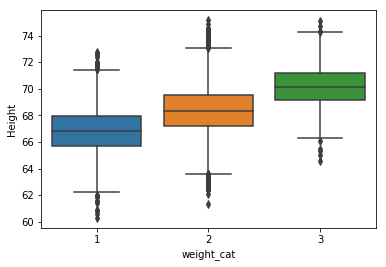

In [36]:
sns.boxplot(x = data['weight_cat'], y = data['Height'])

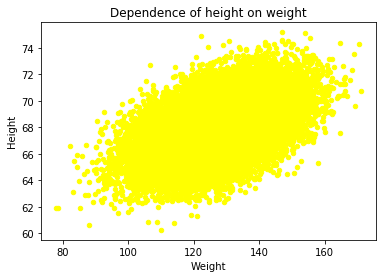

In [37]:
#график типа scatter зависимости роста от веса
data.plot(x='Weight', y='Height', kind='scatter', color='yellow',  title='Dependence of height on weight')



## Задание 2. Минимизация квадратичной ошибки

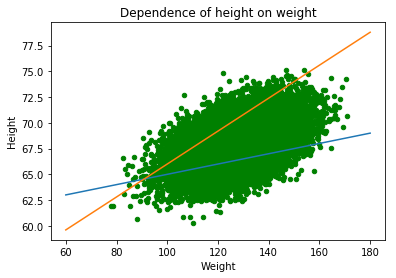

In [41]:
#пишем функцию, которая проходит по каждой строке дата фрейма, вычисляет ошибку, а затем суммирует все значения.
def func_error (w1, w0, myDataframe): #w0 и #w1 веса, которые есть в теоретической формуле, третий аргумент функции наш Датафрейм
    sum_error = 0.0    #определяем переменную, в которой будут суммироваться значения ошибок
    for i in range (1, len(myDataframe.index)+1): #проходимся циклом. количество циклов: от единицы до длины датафрейма плюс один
        error = myDataframe['Height'][i] - (w0 + w1*myDataframe['Weight'][i])
        
        sum_error += error**2
        
    return sum_error
    
#функция зависимости роста от веса (x)    
def  f1 (x):
    return 60 + 0.05*x

def  f2 (x):
    return 50 + 0.16*x

#с помощью метода linspace обозначаем диапазон значений x на оси х
x = np.linspace(60, 180)


#график типа scatter зависимости роста от веса
data.plot(x='Weight', y='Height', kind='scatter', color='green',  title='Dependence of height on weight') 
plt.plot (x,f1(x))
plt.plot (x,f2(x))

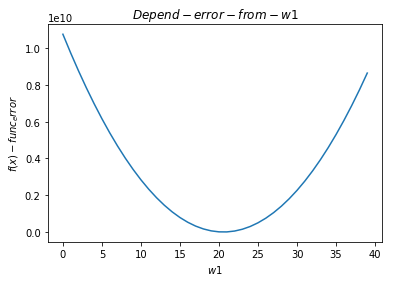

In [61]:
#Построим график зависимости функции ошибки, посчитанной  от параметра  w1  при  w0  = 50


error_risunok = []
 
for w1 in np.arange(-5.0, 5.0, 0.25): #w1 перебирается циклом из диапазона значений генератора np.arang
    error_risunok.append(func_error(w1, 50.0, data)) #на каждой итерации считается значение среднеквадратичной ошибки для всех 25000 строк нашего датафрейма

plt.ylabel('$f(x) - func_error$')
plt.xlabel('$w1$')
plt.title ('$Depend-error-from-w1$')
plt.plot(error_risunok)


In [43]:
w0 = 50
w1_opt = minimize_scalar(func_error, bounds=(-5, 5), args=(w0,data))
print w1_opt

     fun: 79512.21728699486
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728834385


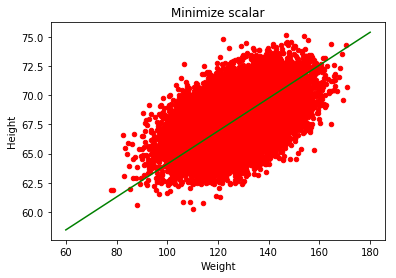

In [48]:
def y(x):
    w0 = 50
    return w0 + w1_opt.x * x
    
x = np.linspace(60, 180)
data.plot(x='Weight', y='Height', kind='scatter', title='Minimize scalar', color='red' )
plt.plot(x, y(x),color='green');

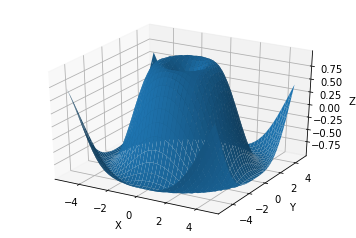

In [49]:
#Создаем объекты типа matplotlib.figure.Figure (рисунок) и matplotlib.axes._subplots.Axes3DSubplot (ось).

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

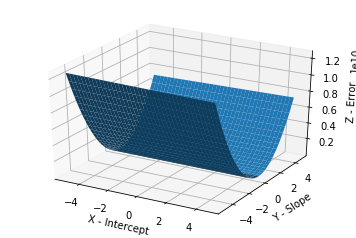

In [51]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = func_error (Y,X,data)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X - Intercept')
ax.set_ylabel('Y - Slope')
ax.set_zlabel('Z - Error')
plt.show()

In [52]:
#С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, 
#для значений параметра  w0  в диапазоне [-100,100] и  w1  - в диапазоне [-5, 5]. Начальная точка – ( w0 ,  w1 ) = (0, 0)
#Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, 
#соответствующую найденным оптимальным значениям параметров  w0  и  w1 . Подпишите оси и график.
def my_y (w):
    return func_error (w[1], w[0],data)
    
w_opt = minimize(my_y, [0.0, 0.0], method='L-BFGS-B', bounds=([-100, 100], [-5, 5]))
print w_opt

      fun: 67545.28708528714
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00727596, 0.18335413])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57171564,  0.08200696])


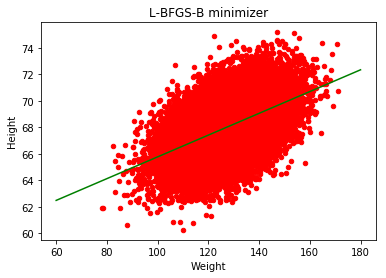

In [54]:
w0_opt = w_opt.x[0]
w1_opt = w_opt.x[1]
    
def line_fync (x):
    return w0_opt + w1_opt * x
    
x = np.linspace(60, 180)
data.plot(x='Weight', y='Height', kind='scatter', title='L-BFGS-B minimizer', color='red',)
plt.plot(x, line_fync(x),color='green');